In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 多項式回帰
多項式回帰は目的変数yを説明変数xの関係を,説明変数xの多項式でモデル化する手法である.つまり,目的変数yは説明変数xのn次多項式で次のようにモデル化される.パラメータは$x,x^2, \cdots,x^n$を新しい変数$z_1,z_2,\cdots,z_n$とみなすことで重回帰分析に帰着し,推定することができる.

$$y = w_0 + w_1 x+ w_1 x^2+ \cdots + w_n x^n$$

データ数m,特徴量の数をnとする.さらにデータの特徴量全体を表す$m\times (n+1)$の行列X,目的変数の実測値を並べたm次元ベクトルy,パラメータを表す(n+1)次元ベクトル$\theta$とするとパラメータ行列$\theta$は次の式で計算できることが知られている.これを正規方程式と呼ぶ.
$$\theta = (X^TX)^{-1}X^Ty$$

参照 : 重回帰分析のノート(https://github.com/yudai0731/Statistics/blob/master/MultivariateAnalysis/%E5%A4%89%E6%95%B0%E9%81%B8%E6%8A%9E(%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90)_data3.ipynb)

In [2]:
df = pd.read_csv("data2.csv")

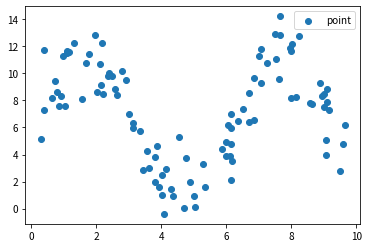

In [4]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

## scikit-learnによる多項式回帰

In [5]:
degree = 4 # 多項式の次数
# 多項式回帰のフォーマットに特徴量を表す行列Xを変換する
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False) # インスタンス化
X_poly = poly_features.fit_transform(X) # フォーマットの変換

In [99]:
# 線形回帰の実行
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [100]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  2.3376592750541203
傾き :  [[14.86732026 -7.81886504  1.31286519 -0.06877474]]
決定係数 :  0.7425858835864452


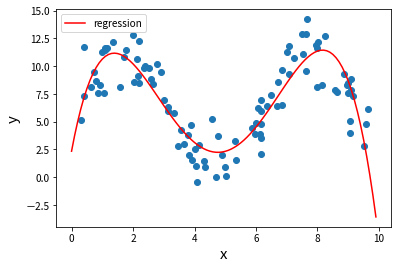

In [101]:
Xpred = np.arange(0,10,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

## 性能評価
多項式回帰を評価する方法として,残差プロット,平均二乗誤差,決定係数,自由度調整済み決定係数が考えられる.

In [108]:
# 自由度調整済み決定係数
def adj_R_squared(n,k,R_squared):
    """
    Description of adj_R_squared
    
    This function calculate adjusted R-squared.
    
    Args : 
    n(int) : number of the data length
    k(int) : number of the parameter of model
    R_squared : R_squared values of the model
    
    Returns :
    adj_R_squared value(float)
    """
    return 1-(n-1)/(n-k-1)*(1-R_squared)

In [111]:
degree = 4 # 多項式の次数
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

poly_features = PolynomialFeatures(degree=degree,include_bias=False) # インスタンス化
Xtrain_poly = poly_features.fit_transform(X_train) # フォーマットの変換
Xtest_poly = poly_features.fit_transform(X_test) # フォーマットの変換

model = LinearRegression() # インスタンス化
model.fit(Xtrain_poly,y_train) # フィッティング

LinearRegression()

In [113]:
from sklearn.metrics import mean_squared_error # MSE(平均二乗誤差)
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数(train) : ",model.score(Xtrain_poly,y_train))
print("自由度調整済み決定係数(train) : ",adj_R_squared(X_train.shape[0],degree+1,model.score(Xtrain_poly,y_train)))
print("MSE(train) : ",mean_squared_error(y_train,model.predict(Xtrain_poly)))
print("決定係数(test) : ",model.score(Xtest_poly,y_test))
print("自由度調整済み決定係数(test) : ",adj_R_squared(X_test.shape[0],degree+1,model.score(Xtest_poly,y_test)))
print("MSE(test) : ",mean_squared_error(y_test,model.predict(Xtest_poly)))

切片 :  0.10479920139214105
傾き :  [[17.15753996 -8.51682633  1.39515643 -0.07206121]]
決定係数(train) :  0.7539769595588965
自由度調整済み決定係数(train) :  0.7361492030051934
MSE(train) :  3.0014231344354174
決定係数(test) :  0.6625795371708335
自由度調整済み決定係数(test) :  0.5737846785315792
MSE(test) :  4.741451580667492


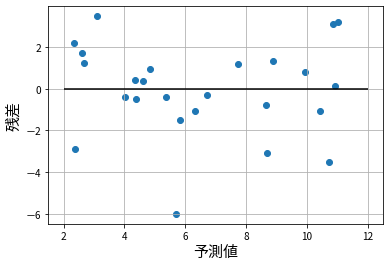

In [116]:
y_pred = model.predict(Xtest_poly)
resid = y_pred-y_test

plt.figure(facecolor="white")
plt.scatter(y_pred,resid)
plt.hlines(y = 0, xmin = 2, xmax = 12, color = 'black') # 要調整
plt.xlabel("予測値",fontsize=15) # predicted value
plt.ylabel("残差",fontsize=15) # residuals
plt.grid()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


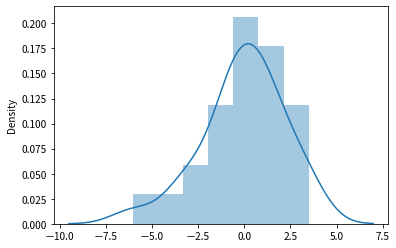

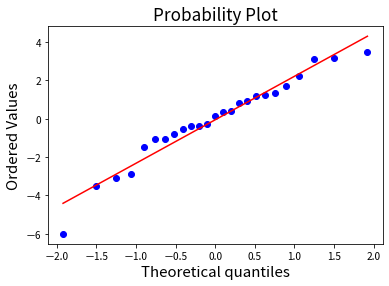

In [118]:
from scipy import stats

# カーネル密度
plt.figure(facecolor='white')
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid.reshape(1,-1)[0],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()

4次元線形回帰のとき,プロットからデータの特徴を捉えているように感じる.自由度調整済み決定係数からtrainではデータを73%,testでは57%説明できていることがわかる.MSEはtestのほうが大きいから,過学習は起きていないと考える.残差プロットから,残差は0を中心に分布しているが線形モデルで捉えきれていないデータがあることがわかる.

## 適切な次元の選択
sklearnのメソッドではAICを計算できないため,次元の選択にはstatsmodelを用いるのがよいと考えた.そこで,指定した範囲の次元を探索して,MSE,AIC,BIC,決定係数$R^2$,自由度調整済み決定係数を計算する.

In [148]:
# 次元の探索範囲
degree_start = 3
degree_end = 10

resultdf = pd.DataFrame(columns={"AIC","BIC","MSE","R-squared","Adj. R-squared"})
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

for degree in range(degree_start,degree_end+1):
    poly_features = PolynomialFeatures(degree=degree,include_bias=False) # インスタンス化
    Xtrain_poly = poly_features.fit_transform(X_train) # フォーマット変換
    # statsmodelで次元選択に役立つ統計量を計算
    model = sm.OLS(y_train, sm.add_constant(Xtrain_poly))
    results = model.fit() 
    resultdf.loc[degree,"AIC"] = results.aic 
    resultdf.loc[degree,"BIC"] = results.bic
    resultdf.loc[degree,"MSE"] = results.mse_model
    resultdf.loc[degree,"R-squared"] = results.rsquared
    resultdf.loc[degree,"Adj. R-squared"] = results.rsquared_adj

In [149]:
resultdf

,MSE,AIC,BIC,R-squared,Adj. R-squared
3,61.3177,391.613,400.883,0.201045,0.167287
4,172.469,305.272,316.86,0.753977,0.739919
5,142.088,300.087,313.992,0.776452,0.760252
6,125.451,284.725,300.948,0.822649,0.807
7,107.56,286.628,305.168,0.822878,0.804372
8,94.1265,288.585,309.443,0.82298,0.801523
9,83.7272,290.338,313.513,0.823563,0.799133
10,75.3561,292.33,317.823,0.82358,0.796015


MSEは7次元,AICおよびBICは6次元のときに最小になる.自由度調整済み決定係数は6次元,決定係数は7次元のときに最大になる.これより6次元を最適な次元として選択する.

## 選択した次元における多項式回帰

In [150]:
degree = 6 # 多項式の次数
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

poly_features = PolynomialFeatures(degree=degree,include_bias=False) # インスタンス化
Xtrain_poly = poly_features.fit_transform(X_train) # フォーマットの変換
Xtest_poly = poly_features.fit_transform(X_test) # フォーマットの変換

model = LinearRegression() # インスタンス化
model.fit(Xtrain_poly,y_train) # フィッティング

LinearRegression()

In [151]:
from sklearn.metrics import mean_squared_error # MSE(平均二乗誤差)
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数(train) : ",model.score(Xtrain_poly,y_train))
print("自由度調整済み決定係数(train) : ",adj_R_squared(X_train.shape[0],degree+1,model.score(Xtrain_poly,y_train)))
print("MSE(train) : ",mean_squared_error(y_train,model.predict(Xtrain_poly)))
print("決定係数(test) : ",model.score(Xtest_poly,y_test))
print("自由度調整済み決定係数(test) : ",adj_R_squared(X_test.shape[0],degree+1,model.score(Xtest_poly,y_test)))
print("MSE(test) : ",mean_squared_error(y_test,model.predict(Xtest_poly)))

切片 :  3.547372316897609
傾き :  [[ 5.30792825e+00  3.58962046e+00 -3.75240923e+00  9.57560788e-01
  -9.63271510e-02  3.39892652e-03]]
決定係数(train) :  0.822648543324506
自由度調整済み決定係数(train) :  0.804119286656917
MSE(train) :  2.163645990380643
決定係数(test) :  0.7410993942397796
自由度調整済み決定係数(test) :  0.6344932624561593
MSE(test) :  3.638086072566013


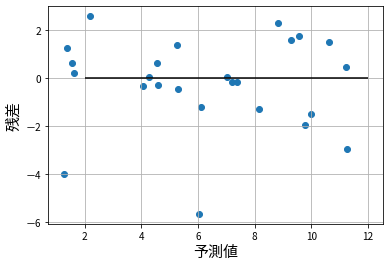

In [152]:
y_pred = model.predict(Xtest_poly)
resid = y_pred-y_test

plt.figure(facecolor="white")
plt.scatter(y_pred,resid)
plt.hlines(y = 0, xmin = 2, xmax = 12, color = 'black') # 要調整
plt.xlabel("予測値",fontsize=15) # predicted value
plt.ylabel("残差",fontsize=15) # residuals
plt.grid()
plt.show()

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


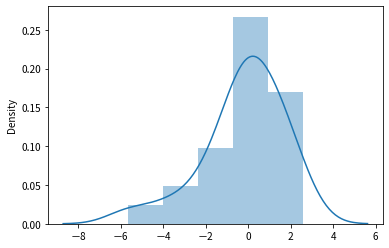

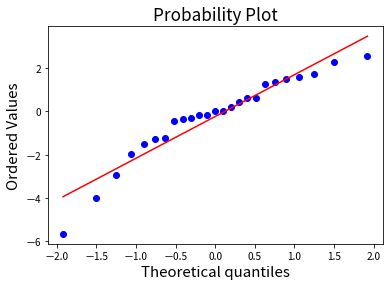

In [153]:
from scipy import stats

# カーネル密度
plt.figure(facecolor='white')
sns.distplot(resid)
plt.show()

# 正規QQプロット
plt.figure(facecolor='white')
stats.probplot(resid.reshape(1,-1)[0],dist=stats.norm,plot=plt)
plt.xlabel("Theoretical quantiles",fontsize = 15)
plt.ylabel("Ordered Values",fontsize = 15)
plt.title("Probability Plot",fontsize = 17)
plt.show()